In [1]:
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
from IPython.core.display import Image
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from playsound import playsound

Using TensorFlow backend.


In [2]:
categories=['safe','danger']

def load_image_and_predict(file):
    
    image=load_img(file)
    display(image)
    
    IM_WIDTH=500
    IM_HEIGHT=275
    
    image_resize=load_img(file, target_size=(IM_WIDTH,IM_HEIGHT))
    image_arr_dm3 = img_to_array(image_resize)
    image_arr_dm4 = image_arr_dm3.reshape((1,IM_WIDTH,IM_HEIGHT,3))
    
    model = Sequential()
    
    # Showing if the baby's in safe or danger
    if 'eat' in file[:-3]:
        model = models.load_model('Baby_eat.h5') # load pretrained model
        categories=['difficult..','danger','safe']
    elif 'door' in file[:-3]:
        model = models.load_model('Baby_door.h5')
        categories=['difficult..','danger','safe']
    elif 'fall' in file[:-3]:
        model = models.load_model('Baby_fall.h5')
        categories=['difficult..','danger','safe']
    elif 'kitchen' in file[:-3]:
        model = models.load_model('Baby_kitchen.h5')
        categories=['difficult..','safe','danger']
    else:
        print('사진에 적합한 모델이 없습니다.')

    predict = model.predict_classes(image_arr_dm4)
    answer = categories[int(predict)]
    print(answer)
    
    # Playing Mom's voice in each situation, Mom and baby hears it immediately
    if ('eat' in file[:-3]) & (answer == 'danger'):
        return playsound('EatWarning.mp3')
    elif ('door' in file[:-3]) & (answer == 'danger'):
        return playsound('DoorWarning.mp3')
    elif ('fall' in file[:-3]) & (answer == 'danger'):
        return playsound('FallWarning.mp3')
    elif ('kitchen' in file[:-3]) & (answer == 'danger'):
        return playsound('FallWarning.mp3')

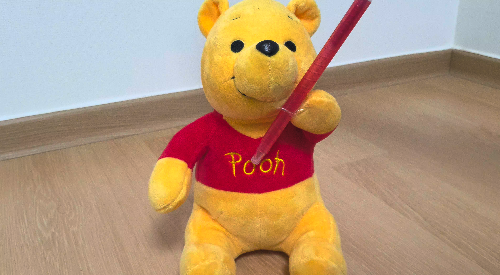

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
danger


In [3]:
load_image_and_predict('test_danger_eat.bmp')

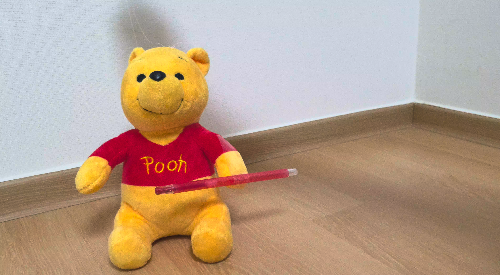

safe


In [4]:
load_image_and_predict('test_safe_eat.bmp')

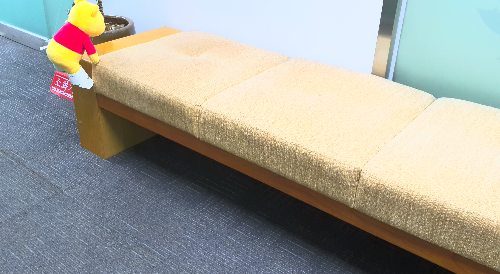

danger


In [5]:
load_image_and_predict('test_danger_fall.bmp')

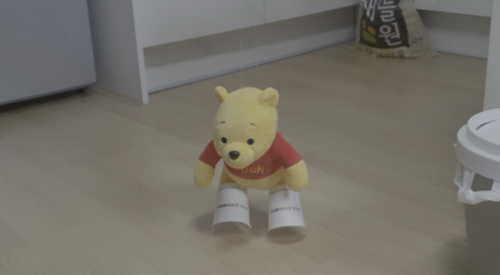

danger


In [62]:
load_image_and_predict('test_danger_kitchen.bmp')

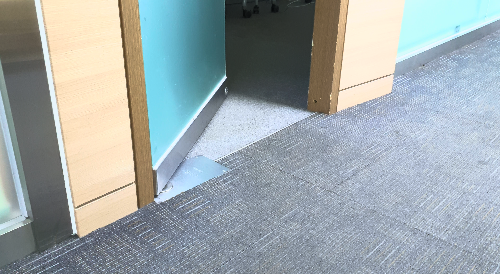

safe


In [57]:
load_image_and_predict('test_safe_door.bmp')